# Analysis of TV Show Data

## Setup

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!conda list '(matplotlib|seaborn|python$|scipy)'

# packages in environment at /Users/rcharan/anaconda3/envs/learn-env:
#
# Name                    Version                   Build  Channel
ipython                   6.5.0                    py36_0  
matplotlib                3.1.1                    py36_1    conda-forge
matplotlib-base           3.1.1            py36h3a684a6_1    conda-forge
mysql-connector-python    8.0.17           py36h7d2c6da_0    conda-forge
python                    3.6.6                hc167b69_0  
scipy                     1.3.1            py36h1410ff5_0  
seaborn                   0.9.0                    py36_0  


In [4]:
%matplotlib inline

In [5]:
# Import Data
from db import *
nielsen   = query('SELECT * FROM nielsen')
streaming = query('SELECT * FROM streaming')

In [6]:
pd.set_option('display.max_columns', 100)

sns.set_context('talk')
sns.set_style('darkgrid', {'patch.edgecolor' : 'none', 'patch.force_edgecolor' : False})

In [7]:
nielsen.head()

,rt_id,title,critic_rating,audience_rating,network,genre,executive_producers,demo_rating,date
0,live_pd,Live PD,NaN,75.0,A&E,Special Interest,"['Dan Cesareo', 'David Doss', 'George McTeague...",0.4,2019-10-25
1,live_pd,Live PD,NaN,75.0,A&E,Special Interest,"['Dan Cesareo', 'David Doss', 'George McTeague...",0.5,2019-10-18
2,live_pd,Live PD,NaN,75.0,A&E,Special Interest,"['Dan Cesareo', 'David Doss', 'George McTeague...",0.5,2019-10-11
3,live_pd,Live PD,NaN,75.0,A&E,Special Interest,"['Dan Cesareo', 'David Doss', 'George McTeague...",0.5,2019-10-04
4,live_pd,Live PD,NaN,75.0,A&E,Special Interest,"['Dan Cesareo', 'David Doss', 'George McTeague...",0.5,2019-09-27


In [8]:
streaming.head()

,title,critic_rating,audience_rating,network,premiere_date,genre,executive_producers
0,Bloodline,62.0,76.0,Netflix,2015-03-20,Drama,"['Todd A. Kessler', 'Daniel Zelman', 'Glenn Ke..."
1,The Ranch,63.0,73.0,Netflix,2016-04-01,Comedy,"['Don Reo', 'Jim Patterson']"
2,Good Girls Revolt,73.0,97.0,Amazon,2016-10-28,Drama,"['Dana Calvo', 'Lynda Obst', 'Darlene Hunt', '..."
3,"The Mind, Explained",NaN,100.0,Netflix,2019-09-12,Documentary,None
4,Bonding,64.0,78.0,Netflix,2019-04-24,Comedy,"['Rightor Doyle', 'Jacob Perlin', 'Nina Sorian..."


## Descriptive Statistics

In [9]:
nielsen.describe()

,critic_rating,audience_rating,demo_rating
count,8071.000000,19691.000000,24363.000000
mean,80.508115,81.466711,0.434548
std,9.773553,14.495839,0.273431
min,11.000000,17.000000,0.100000
25%,71.000000,67.000000,0.300000
50%,78.000000,87.000000,0.400000
75%,88.000000,93.000000,0.500000
max,100.000000,100.000000,5.800000


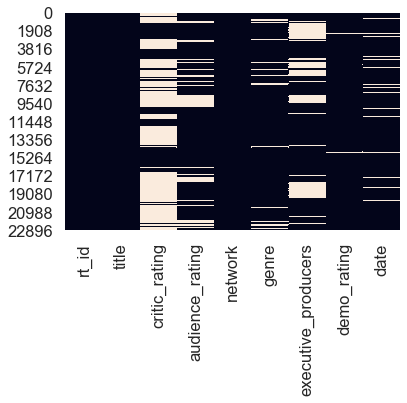

In [10]:
sns.heatmap(nielsen.isna(), cbar=False);

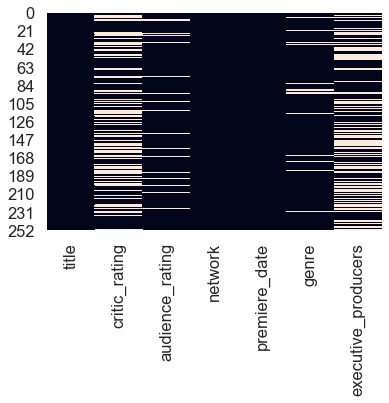

In [11]:
sns.heatmap(streaming.isna(), cbar=False);

## Analysis

In [12]:
nielsen.columns

Index(['rt_id', 'title', 'critic_rating', 'audience_rating', 'network',
       'genre', 'executive_producers', 'demo_rating', 'date'],
      dtype='object')

In [13]:
avged = \
nielsen.groupby('rt_id').agg({
     'title'               : 'first'
    ,'critic_rating'       : 'first'
    ,'audience_rating'     : 'first'
    ,'network'             : 'first'
    ,'genre'               : 'first'
    ,'executive_producers' : 'first'
    ,'demo_rating'         : 'mean'
})

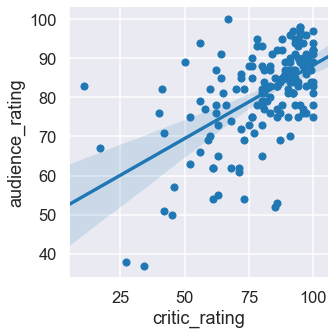

In [40]:
sns.lmplot(y = 'audience_rating', x = 'critic_rating', data = avged, palette = 'muted', scatter_kws={"s": 50, "alpha": 1});

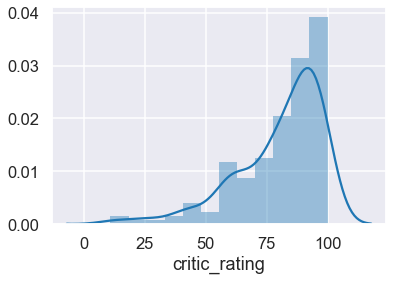

In [15]:
sns.distplot(avged.critic_rating.dropna());

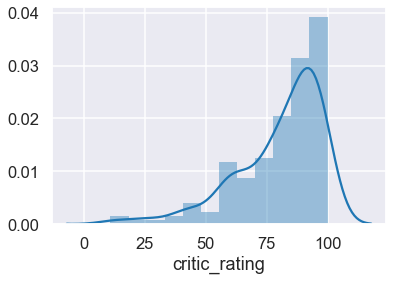

In [16]:
sns.distplot(avged.critic_rating.dropna());

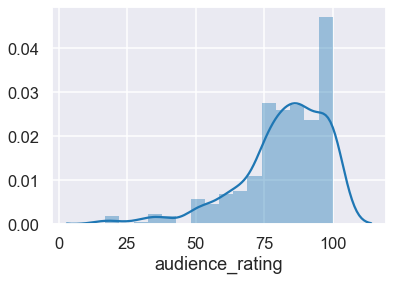

In [17]:
sns.distplot(avged.audience_rating.dropna());

In [18]:
avged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, a_very_brady_renovation to z_nation
Data columns (total 7 columns):
title                  503 non-null object
critic_rating          172 non-null float64
audience_rating        336 non-null float64
network                499 non-null object
genre                  395 non-null object
executive_producers    349 non-null object
demo_rating            500 non-null float64
dtypes: float64(3), object(4)
memory usage: 51.4+ KB


# You don't need to make amazing TV
## If anything, better audience/critic ratings lead to less viewership

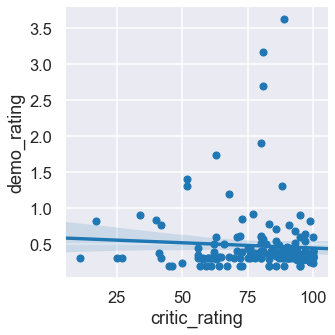

In [19]:
sns.lmplot(x = 'critic_rating', y = 'demo_rating', data = avged, palette = 'muted', scatter_kws={"s": 50, "alpha": 1});

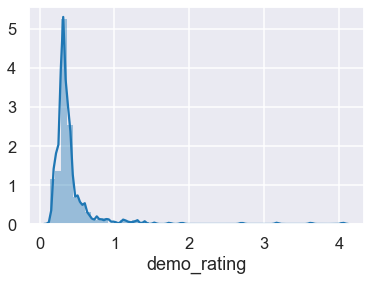

In [20]:
sns.distplot(avged.demo_rating.dropna());

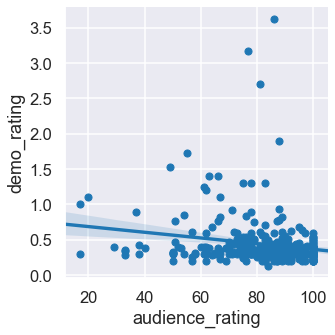

In [21]:
sns.lmplot(x = 'audience_rating', y = 'demo_rating', data = avged, palette = 'muted', scatter_kws={"s": 50, "alpha": 1});

In [22]:
len(avged)

503

In [23]:
avged[avged.demo_rating > 1].sort_values('demo_rating')

,title,critic_rating,audience_rating,network,genre,executive_producers,demo_rating
rt_id,,,,,,,
love_and_hip_hop_atlanta,Love & Hip Hop Atlanta,NaN,20.0,VH1,Television,['Mona Scott-Young'],1.105882
talking_dead,Talking Dead,NaN,67.0,AMC,Special Interest,None,1.108046
wwe_monday_night_raw,WWE Monday Night Raw,NaN,NaN,USA,None,None,1.111111
big_brother,Big Brother 16,NaN,NaN,CBS,None,"['Allison Grodner', 'Rich Meehan']",1.148148
american_horror_story_hotel,American Horror Story: Hotel,NaN,NaN,FX,None,"['Dante di Loreto', 'Ryan Murphy', 'Brad Falch...",1.166667
madoff,Madoff,68.0,62.0,ABC,Drama,"['Linda Berman', 'Joe Pichirallo']",1.200000
americas_got_talent,America's Got Talent,NaN,61.0,NBC,None,"['Simon Cowell', 'Ken Warwick', 'Cecile Frot-C...",1.250000
shark,Shark,52.0,75.0,DISCOVERY,Drama,"['Brian Grazer', 'David Nevins', 'Ian Biederma...",1.300000
the_terror,The Terror,88.0,78.0,AMC,Drama,"['Ridley Scott', 'David W. Zucker', 'Alexandra...",1.300000


In [35]:
avged[avged.audience_rating < 30].sort_values('demo_rating')

,title,critic_rating,audience_rating,network,genre,executive_producers,demo_rating
rt_id,,,,,,,
star_wars_forces_of_destiny,Star Wars: Forces of Destiny,NaN,17.0,DISNEY,Animation,None,0.300000
the_view,The View,NaN,29.0,ABC,None,"['Barbara Walters', 'Bill Geddie']",0.400000
jimmy_kimmel_live,Jimmy Kimmel Live,NaN,17.0,ABC,Comedy,"['Jimmy Kimmel', 'Jill Leiderman', 'Daniel Kel...",1.000000
love_and_hip_hop_atlanta,Love & Hip Hop Atlanta,NaN,20.0,VH1,Television,['Mona Scott-Young'],1.105882


In [24]:
import statsmodels.formula.api as sm

In [31]:
lm_audience = sm.ols(formula = 'demo_rating ~ audience_rating', data = avged).fit()

In [32]:
lm_audience.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            demo_rating   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.45
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           0.000800
Time:                        09:38:02   Log-Likelihood:                -120.38
No. Observations:                 333   AIC:                             244.8
Df Residuals:                     331   BIC:                             252.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7671      0.100      7.708      0.000       0.571       0.963
audience_rating    -0.0040      0.001     -3.384      0.001      -0.006      -0.002
==============================================================================
Omnibus:                      390.842   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21292.869
Skew:                           5.324   Prob(JB):                         0.00
Kurtosis:                      40.699   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lm_critic = sm.ols(formula = 'demo_rating ~ critic_rating', data = avged).fit()

In [34]:
lm_critic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            demo_rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5875
Date:                Thu, 31 Oct 2019   Prob (F-statistic):              0.444
Time:                        09:38:21   Log-Likelihood:                -103.15
No. Observations:                 171   AIC:                             210.3
Df Residuals:                     169   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5912      0.157      3.770      0.000       0.282       0.901
critic_rating    -0.0015      0.002     -0.766      0.444      -0.005       0.002
==============================================================================
Omnibus:                      197.703   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5232.464
Skew:                           4.659   Prob(JB):                         0.00
Kurtosis:                      28.447   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lm_critic_audience = sm.ols(formula = 'audience_rating ~ critic_rating', data = avged).fit()

In [38]:
lm_critic_audience.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        audience_rating   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     75.39
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           3.72e-15
Time:                        09:42:19   Log-Likelihood:                -611.11
No. Observations:                 166   AIC:                             1226.
Df Residuals:                     164   BIC:                             1232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.7330      3.568     14.220      0.000      43.688      57.778
critic_rating     0.3750      0.043      8.683      0.000       0.290       0.460
==============================================================================
Omnibus:                       10.449   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.377
Skew:                          -0.450   Prob(JB):                      0.00205
Kurtosis:                       3.989   Cond. No.                         393.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""